In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
import os

Kontrast berechnen

In [7]:
md = pd.read_csv('tables/kontrast.csv')
md = md.to_numpy()
winkel = md[:,0]
U_max = md[:,1]
U_min = md[:,2]

K = (U_max - U_min) / (U_max + U_min)
K = np.round(K,3)
mdK = np.c_[md,K]
hea = list(['Winkel in °', 'U_{max}', 'U_{min}', 'Kontrast'])
pandas_mdK = pd.DataFrame(mdK, columns=['Winkel', 'Umax', 'Umin', 'Kontrast'])

Parameter:  [0.08778599 0.79556007] 
Fehler:  [0.03828754 0.00853422]
1.1519173063162575
Maximum liegt bei K = 0.7955445415407814 bei einem Winkel von 47.69387755102041


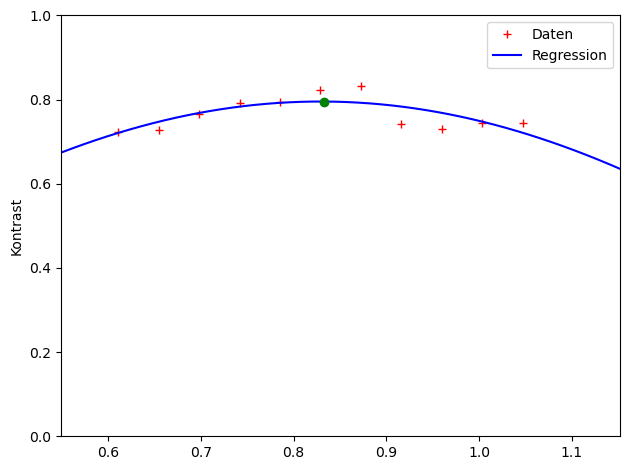

In [8]:
md = pd.read_csv('tables/kontrast.csv')
md = md.to_numpy()

def fit(winkel,delta, A):
    return A * np.abs(np.sin(2 * winkel - delta))
winkel = md[:,0]
winkel = winkel * np.pi / 180
params, cov = curve_fit(fit, winkel, K)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))
x = np.linspace(winkel[0] * 0.9, winkel[-1] *1.1)

print(winkel[-1] *1.1)
plt.plot(winkel, K, 'r+', label="Daten")
plt.scatter(x[fit(x, *params).argmax()], fit(x, *params).max(), c='g', zorder=3)
plt.plot(x, fit(x, *params), 'b', label="Regression")
plt.ylabel('Kontrast')
plt.xlim(x[0], x[-1])
plt.ylim(0, 1)
plt.tight_layout()
plt.legend(loc="best")

print('Maximum liegt bei K = ' + str(fit(x, *params).max()) + ' bei einem Winkel von ' + str(x[fit(x, *params).argmax()] * 180 / np.pi))

Bereche $n_{Luft}$

Parameter:  [-0.68453446 43.03963481] 
Fehler:  [0.17064271 0.31223316]
n = 1.0001338+/-0.0000011


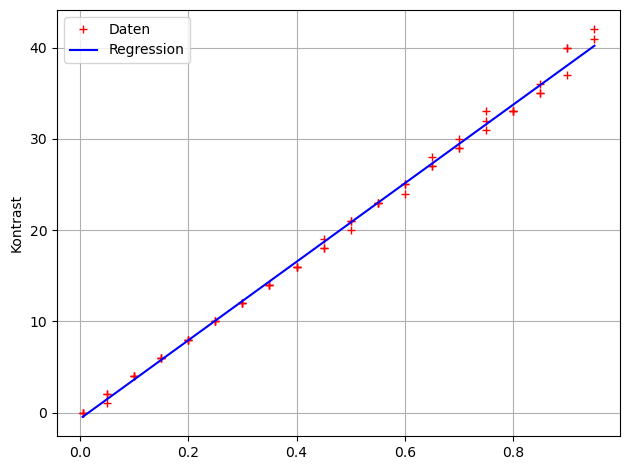

In [9]:
md = pd.read_csv('tables/n_luft.csv')
md = md.to_numpy()
T = const.convert_temperature(21.5, 'Celsius', 'Kelvin')

def func(p, a, m):
    return a + p * m

def nn(M):
    return  M *632.8 * 10**(-9) / L
p = md[:,0]
maxima1 = md[:,1]; maxima2  = md[:,2]; maxima3 = md[:,3]
p_c = np.concatenate((p[:-1],p,p),axis=None)
max_c = np.concatenate((maxima1[:-1],maxima2,maxima3),axis=None)
params, cov = curve_fit(func, p_c, max_c)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))
plt.plot(p_c, max_c, 'r+', label="Daten")
plt.plot(p, func(p, *params), 'b', label="Regression")
plt.ylabel('Kontrast')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")

a = ufloat(params[0], np.sqrt(np.diag(cov))[0])
m = ufloat(params[1], np.sqrt(np.diag(cov))[1])
M = func(0.95, a,m)

print('n = ' + str( M * 332.8 * 10**-8 + 1))

Parameter:  [0.07825291] 
Fehler:  [0.00033909]
           0         1         2
0        1.0  1.000000  1.000000
1   1.000013  1.000013  1.000006
2   1.000025  1.000025  1.000025
3   1.000038  1.000038  1.000038
4   1.000051  1.000051  1.000051
5   1.000063  1.000063  1.000063
6   1.000076  1.000076  1.000076
7   1.000089  1.000089  1.000089
8   1.000101  1.000101  1.000101
9   1.000114  1.000120  1.000114
10  1.000133  1.000127  1.000133
11  1.000146  1.000146  1.000146
12  1.000158  1.000158  1.000152
13  1.000171  1.000171  1.000177
14  1.000184  1.000184  1.000190
15  1.000209  1.000196  1.000202
16  1.000209  1.000209  1.000209
17  1.000221  1.000228  1.000221
18  1.000253  1.000234  1.000253
19         -  1.000259  1.000266


/tmp/ipykernel_9573/1260878290.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  md = md.to_latex(index = False, column_format= "c c c c", decimal=',', header=hea, label='tab:luft', caption="Messwerte zum Brechungsindex von Luft")
/tmp/ipykernel_9573/1260878290.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df = df.to_latex(index = False, column_format= "c c c", decimal=',', header=hea, label='tab:n_berechnet', caption="Berechnete Brechungsindizes aus den Maxima." )

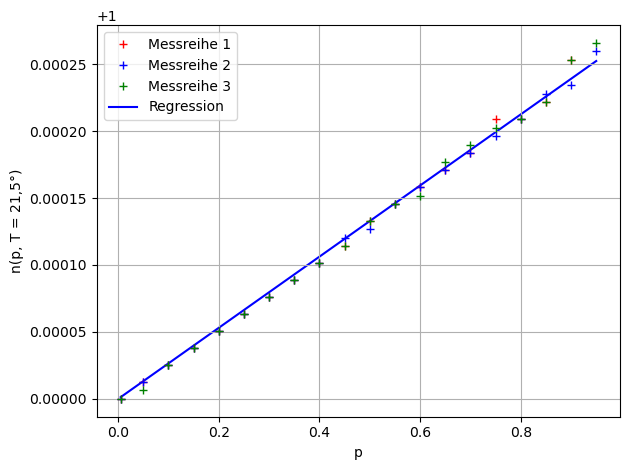

In [22]:
md = pd.read_csv('tables/n_luft.csv')
hea = list(['Maxima', 'Versuch 1', 'Versuch 2', 'Versuch 3'])
md = md.to_latex(index = False, column_format= "c c c c", decimal=',', header=hea, label='tab:luft', caption="Messwerte zum Brechungsindex von Luft")
with open('build/n_luft.txt', 'w') as f:
    f.write(md)

md = pd.read_csv('tables/n_luft.csv')
md = md.to_numpy()
T = const.convert_temperature(21.5, 'Celsius', 'Kelvin')

def func1(p, m):     # Lorentz-Lorenz
    return p * m / T + 1

L = 0.1 # in meter

def n_mit_druck(M): 
    return M * 632.8 * 10**(-9) / L + 1


p = md[:,0]
maxima1 = md[:,1]; maxima2  = md[:,2]; maxima3 = md[:,3]
p_c = np.concatenate((p[:-1],p,p),axis=None)
max_c = np.concatenate((maxima1[:-1],maxima2,maxima3),axis=None)

n_mit_druck_gemessen = n_mit_druck(max_c)
params, cov = curve_fit(func1, p_c, n_mit_druck_gemessen)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

# plt.plot(p_c, n_mit_druck_gemessen, 'r+', label="Daten")
plt.plot(p[:-1], n_mit_druck(maxima1[:-1]), 'r+', label="Messreihe 1")
plt.plot(p[:], n_mit_druck(maxima2), 'b+', label="Messreihe 2")
plt.plot(p[:], n_mit_druck(maxima3), 'g+', label="Messreihe 3")
plt.plot(p, func1(p, *params), 'b', label="Regression", zorder=0)
plt.ylabel('n(p, T = 21,5°)')
plt.xlabel('p')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
# plt.show()

def func2(p, T2, m):
    return p * m / T2 + 1

m = ufloat(params, np.sqrt(np.diag(cov)))

# print(func2(1.013, 15, m))

######################################################
arr = np.zeros((20,3))
arr[:19,0] = n_mit_druck_gemessen[:len(p[:-1])]
arr[:20,1] = n_mit_druck_gemessen[len(p[:-1]):(2 * len(p) -1)]
arr[:20,2] = n_mit_druck_gemessen[(2 * len(p) -1): (3 * len(p) -1)]

df = pd.DataFrame(arr)
df = df.replace(0,str('-'))
print(df)
hea = list(['Versuch 1', 'Versuch 2', 'Versuch 3'])
df = df.to_latex(index = False, column_format= "c c c", decimal=',', header=hea, label='tab:n_berechnet', caption="Berechnete Brechungsindizes aus den Maxima." )


######################################################